# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/Marketing_data.csv')
# CUSTID: Identification of the credit card holder.
# BALANCE: Amount of balance remaining on the customer's account to make purchases.
# BALANCE_FREQUENCY: Frequency of balance update, score between 0 and 1 (1 = updated frequently, 0 = not updated frequently)
# PURCHASES: Number of purchases made from the account
# ONEOFFPURCHASES: Maximum amount of purchase made in one go
# INSTALLMENTS_PURCHASES: Amount of purchase made in installments
# CASH_ADVANCE: Advance given to the user
# PURCHASES_FREQUENCY: Frequency of purchases, score between 0 and 1 (1 = frequent purchases, 0 = infrequent purchases)
# PURCHASES_FREQUENCY: Frequency of Purchases being made, score between 0 and 1 (1 = purchases frequently, 0 = not frequent purchases)
# ONEOFF_PURCHASES_FREQUENCY: How often purchases are being made at one time (1 = purchase frequently, 0 = do not purchase frequently)
# PURCHASES_INSTALLMENTS_FREQUENCY: How often installment purchases are made (1 = frequently made, 0 = not frequently made)
# CASH_ADVANCE_FREQUENCY: How often the expense is paid in advance.
# CASH_ADVANCE_TRX: number of transactions made with "Cash in advance".
# PURCHASES_TRX: number of purchase transactions performed
# CREDIT_LIMIT: credit card limit for the user
# PAYMENTS: number of payments made by the user
# MINIMUM_PAYMENTS: minimum number of payments made by the user 
# PRC_FULL_PAYMENTS: minimum number of payments made by the user
# PRC_FULL_PAYMENT: percentage of total payment paid by the user
# TENURE: Years that the user has been using the credit card service

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Dataset dimensions
# ==================
creditcard_df.shape

(8950, 18)

In [ ]:
creditcard_df.describe()
# Average balance is $1564 
# Balance frequency is updated quite often, on average ~0.9
# Average purchase amount is $1000
# Maximum non-recurring purchase amount averages ~$600
# Average frequency of purchases is close to 0.5
# Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY is generally low
# Average credit limit is ~ 4500
# Percentage of full payment is 15%
# Customers have been in service for an average of 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Highest purchase $40761
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Client who requests more money
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# This customer made a total of 123 transactions in advance
# Never pay for your purchases completely with the card
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# DATASET VISUALIZATION

<Axes: >

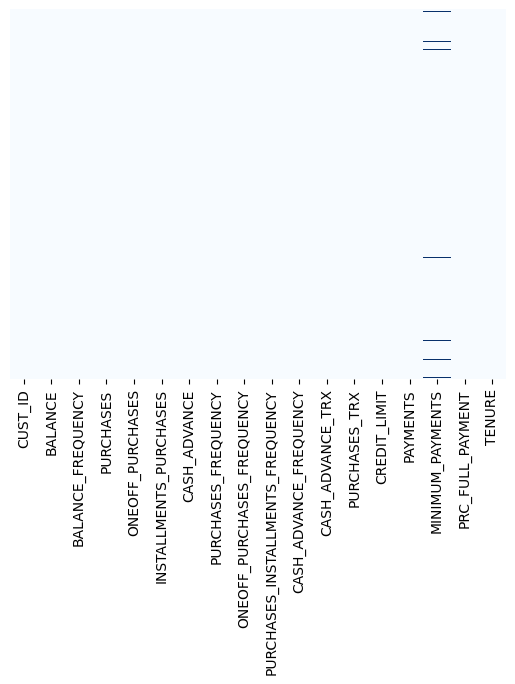

In [ ]:
# Checking for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [ ]:
creditcard_df.isna().sum().sort_values()

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

In [ ]:
# Let's fill in the missing data with the average of the field 'MINIMUM_PAYMENT'.
# loc() shows the rows MINIMUM_PAYMENT where is null
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [5]:
# By using loc() we replace missings with MINIMUM_PAYMENTS' mean
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df.isna().sum().sort_values()

CUST_ID                             0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PRC_FULL_PAYMENT                    0
ONEOFF_PURCHASES_FREQUENCY          0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
BALANCE                             0
PURCHASES_FREQUENCY                 0
TENURE                              0
CREDIT_LIMIT                        1
dtype: int64

In [6]:
# Let's fill in the missing data with the average of the field 'CREDIT_LIMIT'.
# By using loc() we replace missings with CREDIT_LIMIT'S mean
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

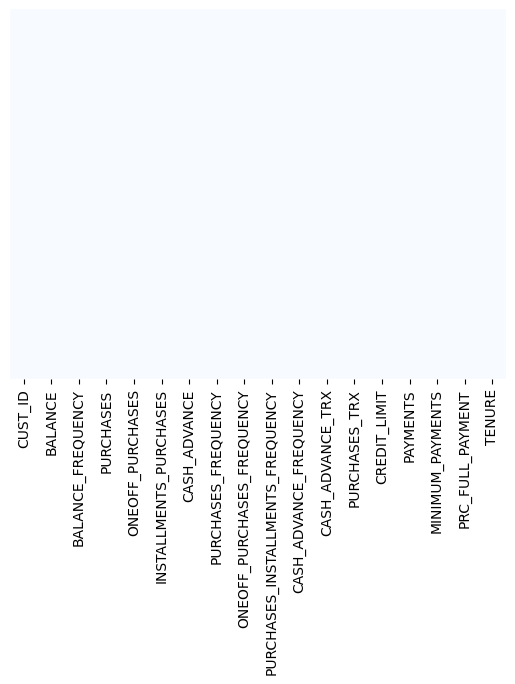

In [7]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [8]:
# Checking for duplicates
creditcard_df.duplicated().sum()

0

In [9]:
# Dropping the column the categorical column 'CUST_ID'
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

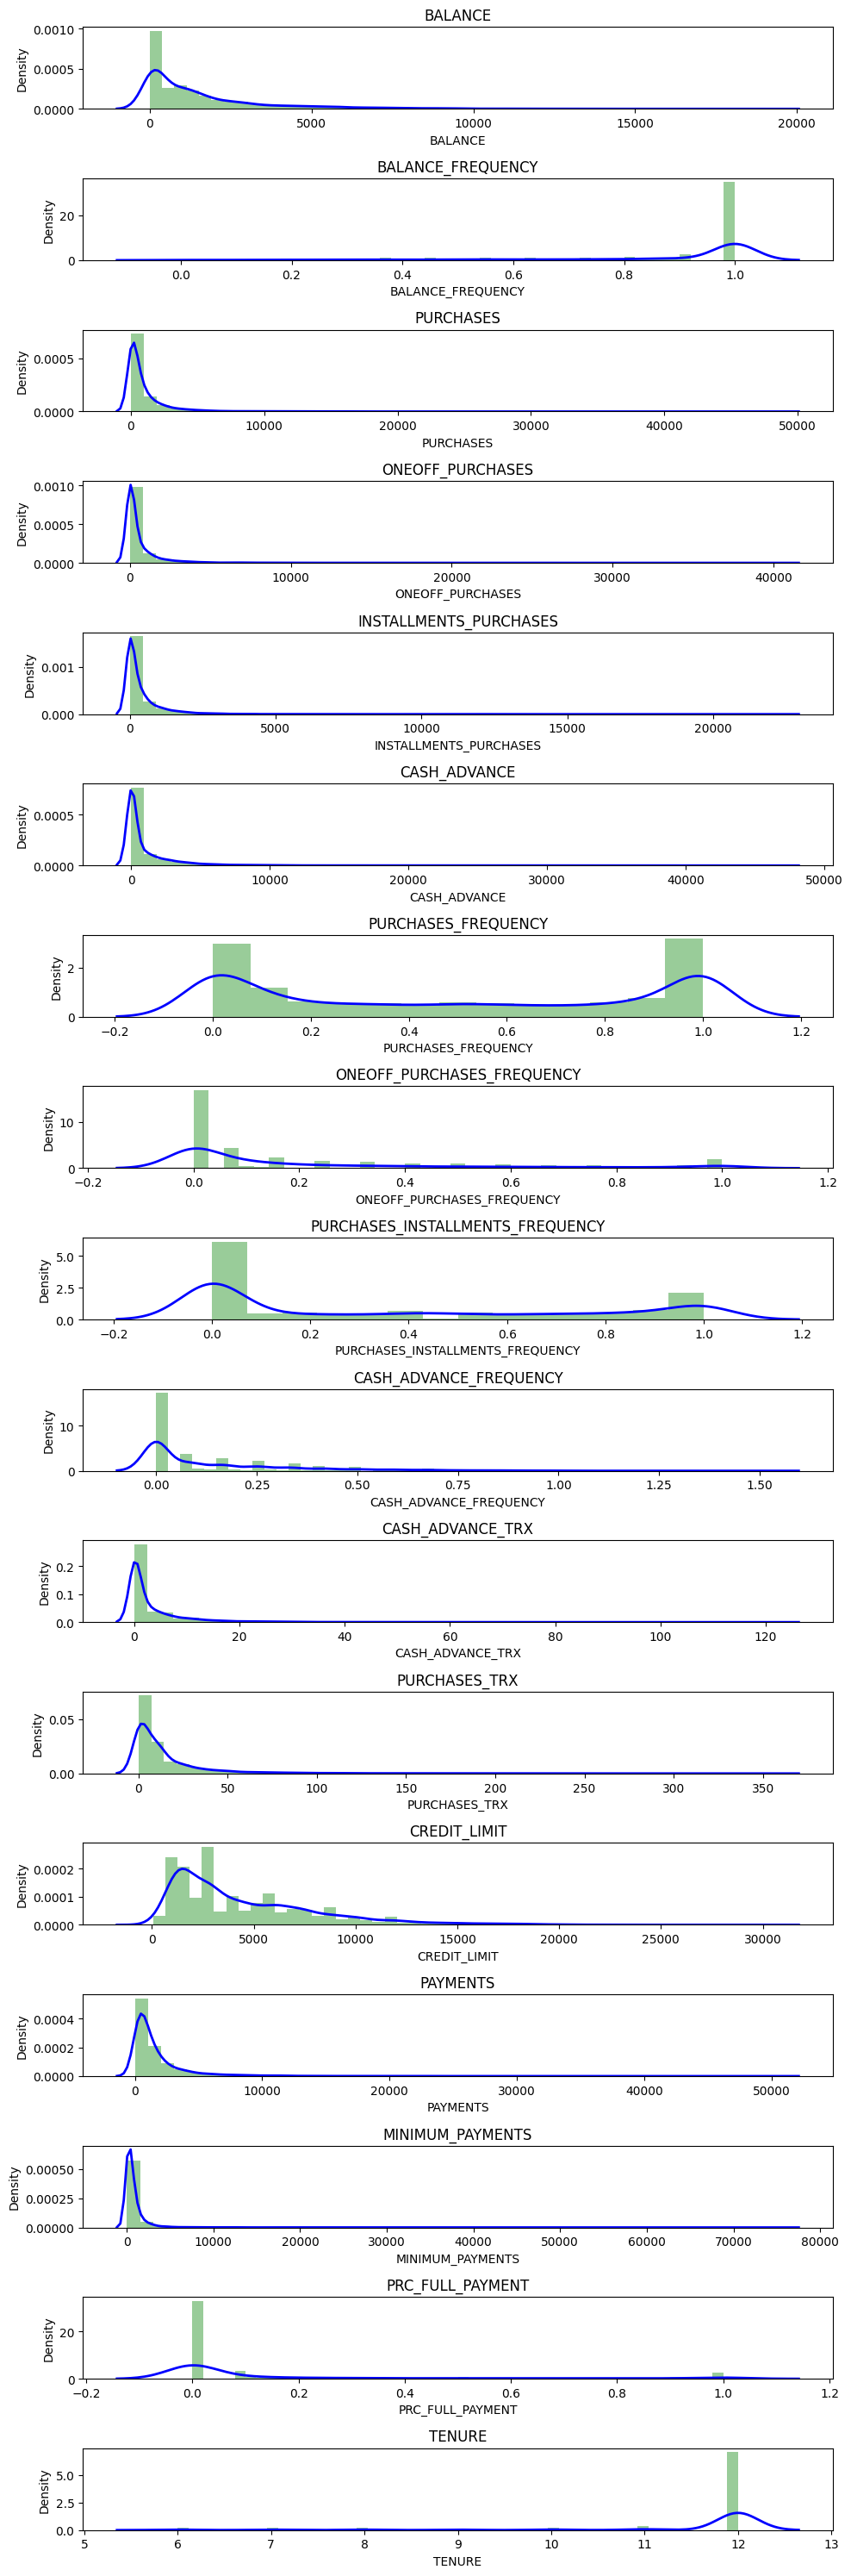

In [ ]:
# Average balance is $1500
# 'Balance_Frequency' for many users is updated very frequently ~1
# For the field 'PURCHASES_FREQUENCY', there are two different groups of customers
# For the fields 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' the vast majority of users do not pay all at once or in installments.
# Very few customers pay their debt in full 'PRC_FULL_PAYMENT'~0
# The average credit limit is around $4500
# Most customers have been using the service for ~11 years
# two types of customers can be seen in majority with the PURCHASES_INSTALLMENT_FREQUENCY variables

plt.figure(figsize = (10,30))
for i in range(n):
  plt.subplot(n, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color":"b", "lw":2, "label":"KDE"}, hist_kws={"color":"g"})
  plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [ ]:
correlations = creditcard_df.corr()

<Axes: >

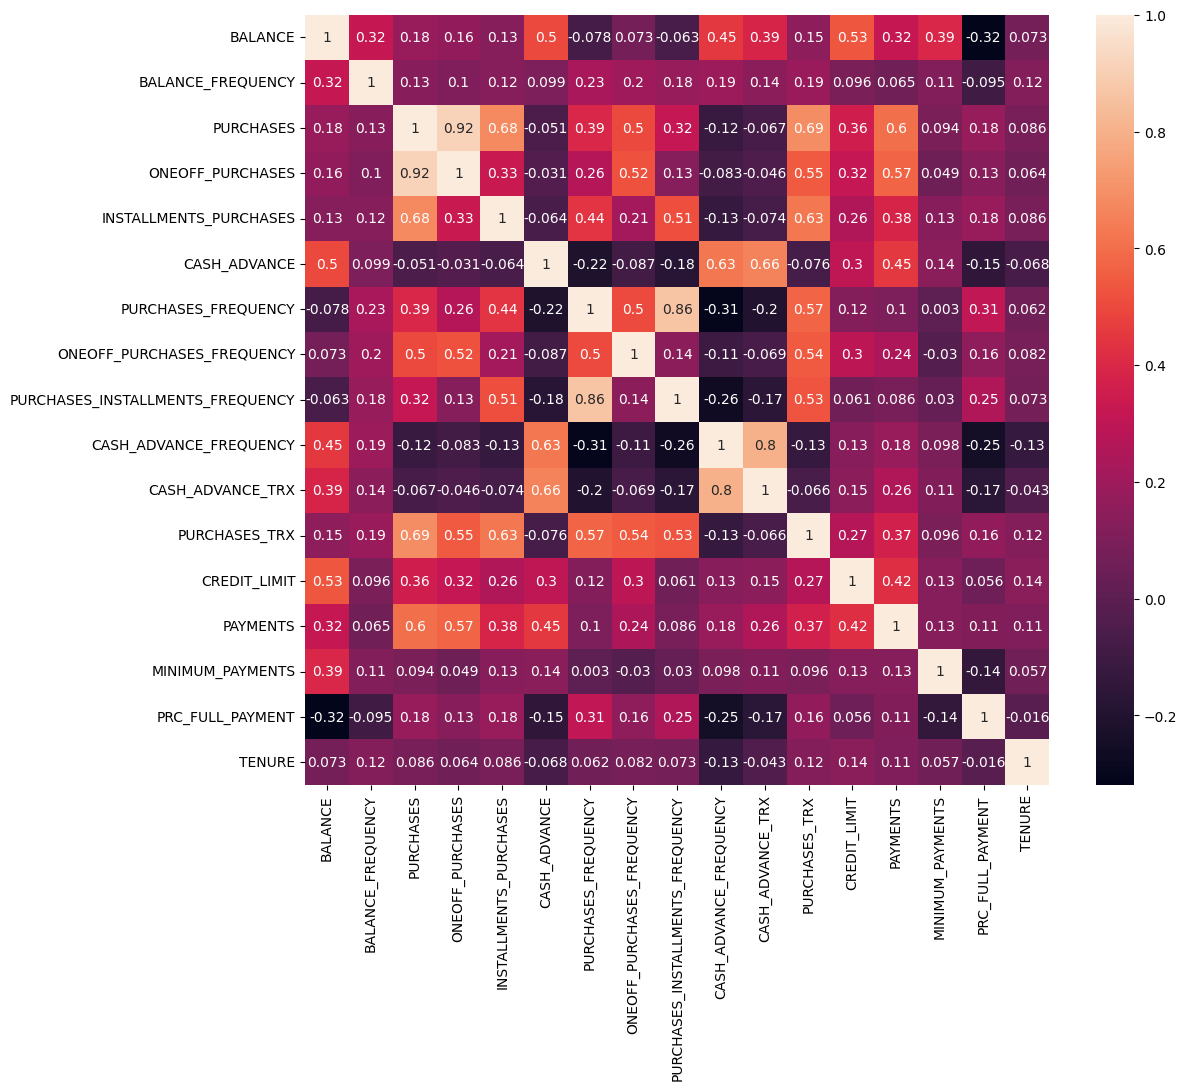

In [ ]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(correlations, annot=True)
# PURCHASES' have a high correlation with one-off purchases, installment purchases, purchase transactions, credit limit and payments. 
# Very high positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'.


# Optimal number of clusters using the elbow method

In [10]:
# Scaling the dataset using StandardScaler
# StandardScaler removes the mean and scales each feature/variable to unit variance.
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

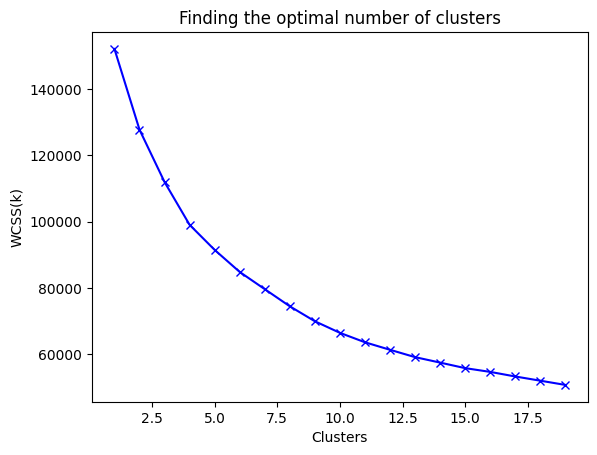

In [12]:
scores_1 = []
range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) # WCSS

plt.plot(range_values, scores_1, 'bx-') # parameters and points x-
plt.title("Finding the optimal number of clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()
# From the graph we can see that in 6 clusters is where the bend of the curve is formed.
# However, the values do not reduce to a linear form until the 8th cluster. 
# Let's choose a number of clusters equal to 8.

# APPLYING THE K-MEANS METHOD

In [13]:
kmeans = KMeans(8) # number of clusters k = 8, let's use k = 8
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [14]:
kmeans.cluster_centers_.shape

(8, 17)

In [15]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.011408,0.404979,-0.354500,-0.238970,-0.399071,-0.099310,-0.842531,-0.383394,-0.751996,0.095086,-0.035034,-0.477986,-0.304548,-0.252120,-0.008093,-0.455485,0.273007
1,-0.700916,-2.135919,-0.309790,-0.234351,-0.301835,-0.322887,-0.552623,-0.440210,-0.438526,-0.522023,-0.376648,-0.418105,-0.175016,-0.201945,-0.257046,0.284044,0.201773
2,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
3,-0.359436,0.332329,-0.030104,-0.240477,0.370422,-0.361532,0.995611,-0.379874,1.206299,-0.471380,-0.359073,0.194259,-0.260099,-0.212784,-0.035938,0.312988,0.255570
4,-0.116553,0.402904,0.581070,0.704286,0.079837,-0.331858,0.998769,1.914667,0.213923,-0.416854,-0.332654,0.666655,0.468977,0.172669,-0.154924,0.461106,0.275148
5,1.110524,0.475325,2.588476,1.854742,2.713051,-0.123777,1.169487,1.564483,1.291923,-0.266764,-0.124655,3.244086,1.345044,1.526301,0.726365,0.244626,0.335310
6,1.669404,0.390095,-0.221249,-0.157449,-0.233946,2.006144,-0.482682,-0.212973,-0.422983,1.918998,1.925983,-0.271367,1.015509,0.816635,0.507443,-0.390751,0.071837
7,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775


In [16]:
# To better understand these values, let's apply the inverse transformation, i.e. inverse_transform are the original values.
clusters_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = clusters_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1588.218856,0.973206,245.810545,195.796700,50.192502,770.614179,0.152202,0.088084,0.065575,0.154172,3.009747,2.828881,3386.377858,1003.280043,845.345347,0.020493,11.882671
1,105.576699,0.371291,341.333789,203.462143,138.122110,301.761115,0.268556,0.071134,0.190156,0.030682,0.678481,4.317300,3857.670417,1148.533664,265.172405,0.236793,11.787342
2,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
3,816.339571,0.955996,938.887722,193.294190,746.035968,220.721994,0.889937,0.089134,0.843852,0.040816,0.798415,19.538385,3548.103121,1117.153790,780.455706,0.245258,11.859336
4,1321.879015,0.972715,2244.670355,1761.407205,483.263150,282.949782,0.891205,0.773640,0.449456,0.051728,0.978705,31.280390,6200.778414,2233.003657,503.163229,0.288580,11.885537
5,3875.937342,0.989871,6533.523642,3670.929321,2864.446173,719.305810,0.959722,0.669173,0.877881,0.081762,2.398148,95.345679,9388.271605,6151.635267,2556.970446,0.225264,11.966049
6,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
7,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.min()

0

In [17]:
labels.max()

7

In [18]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 0, 3, ..., 5, 5, 5], dtype=int32)

In [19]:
# Concatenate the labels of the clusters with the dataset riginal axis = 1 and add the column at the end
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


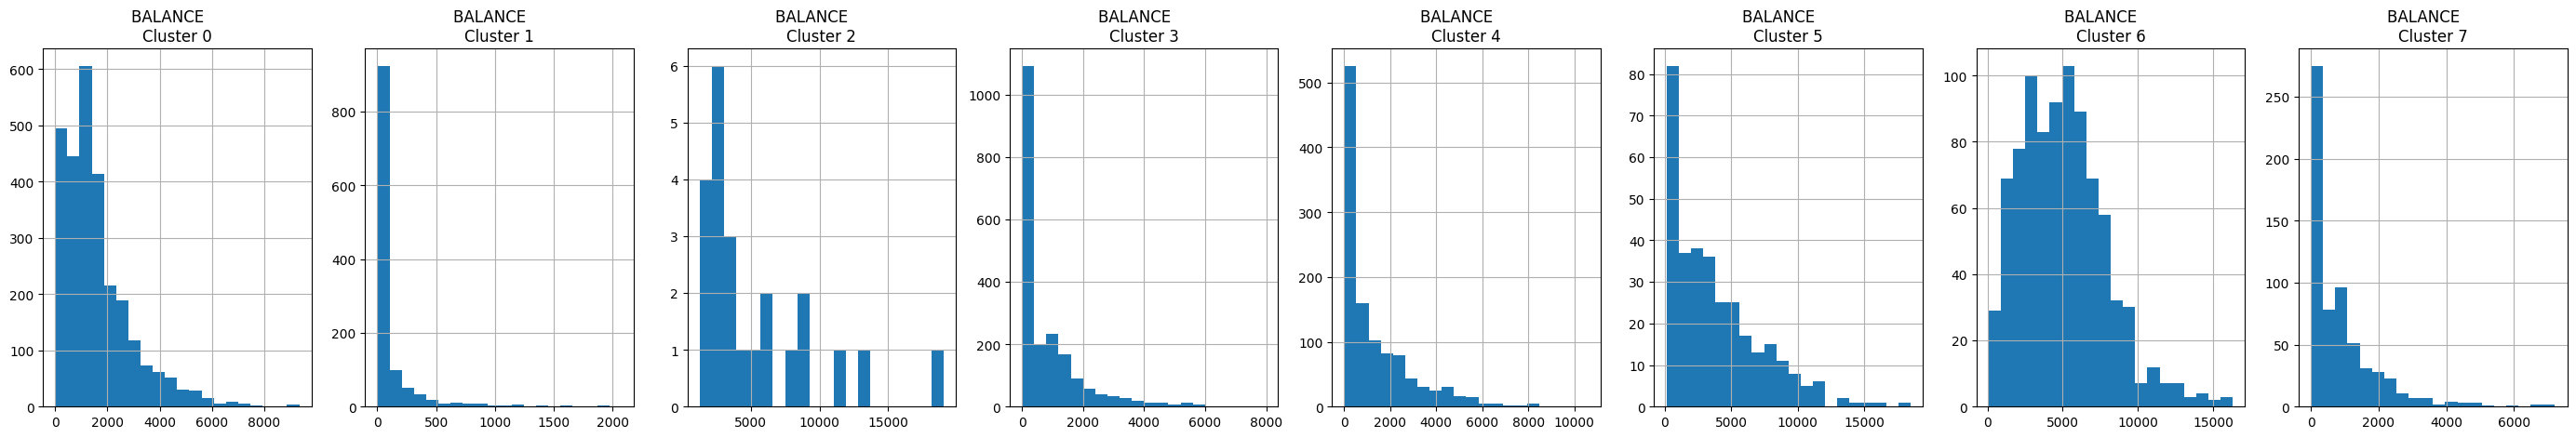

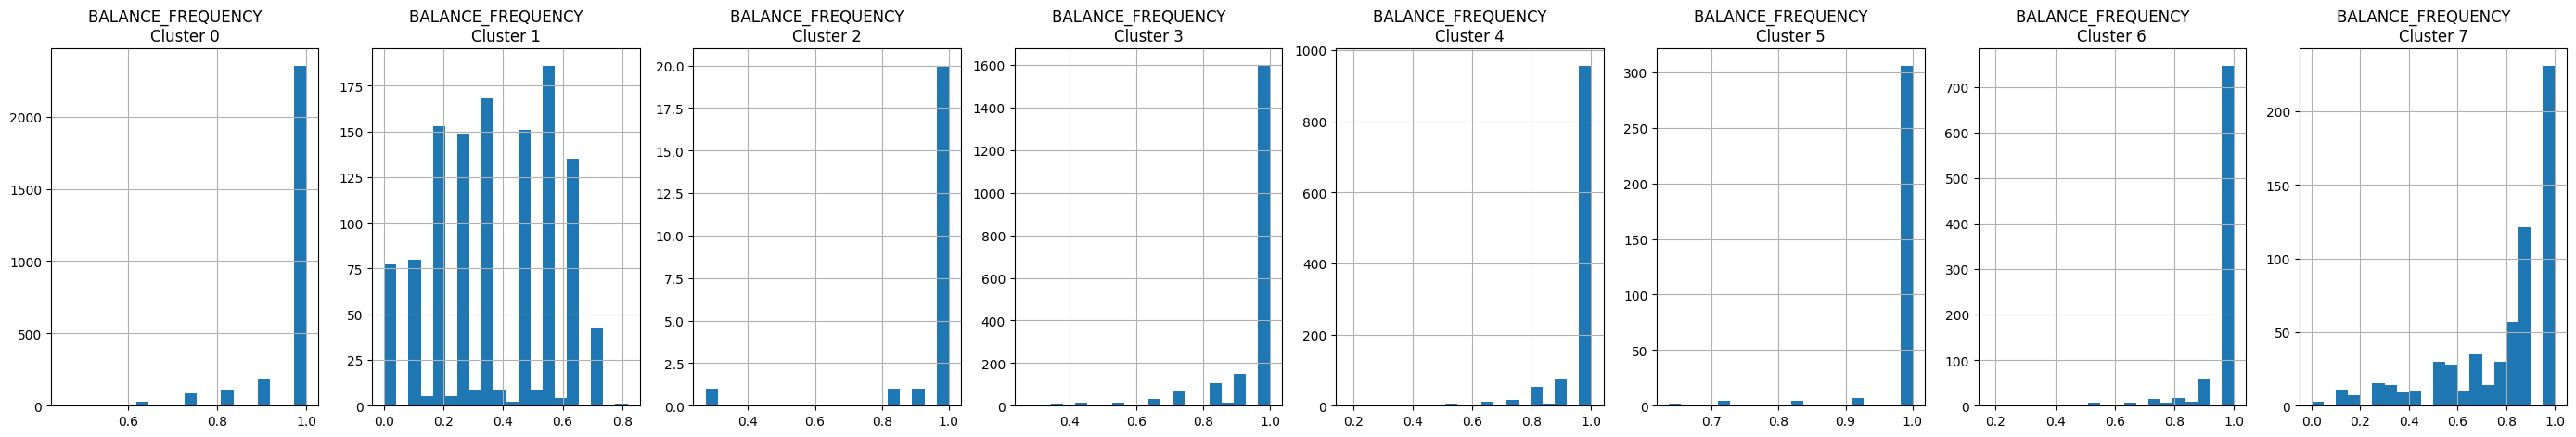

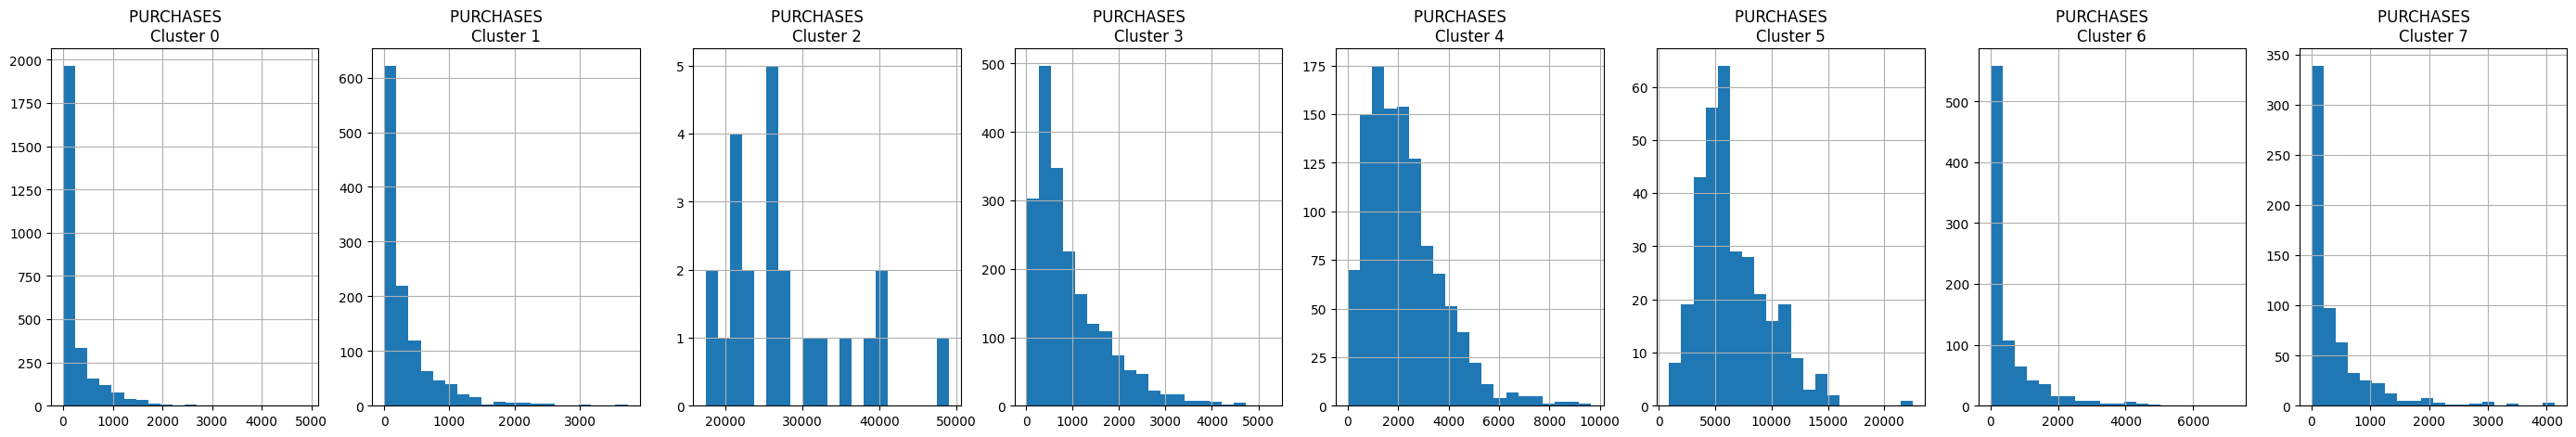

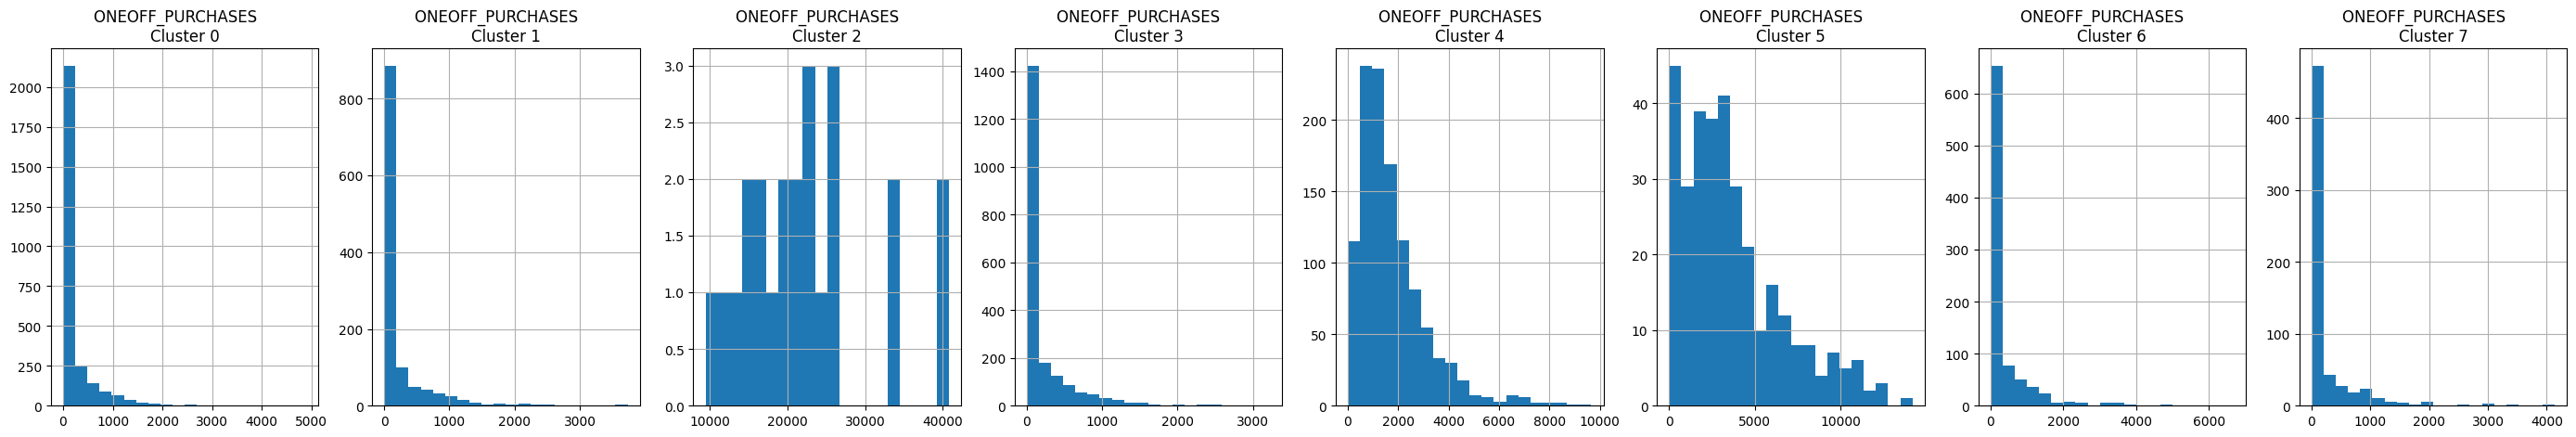

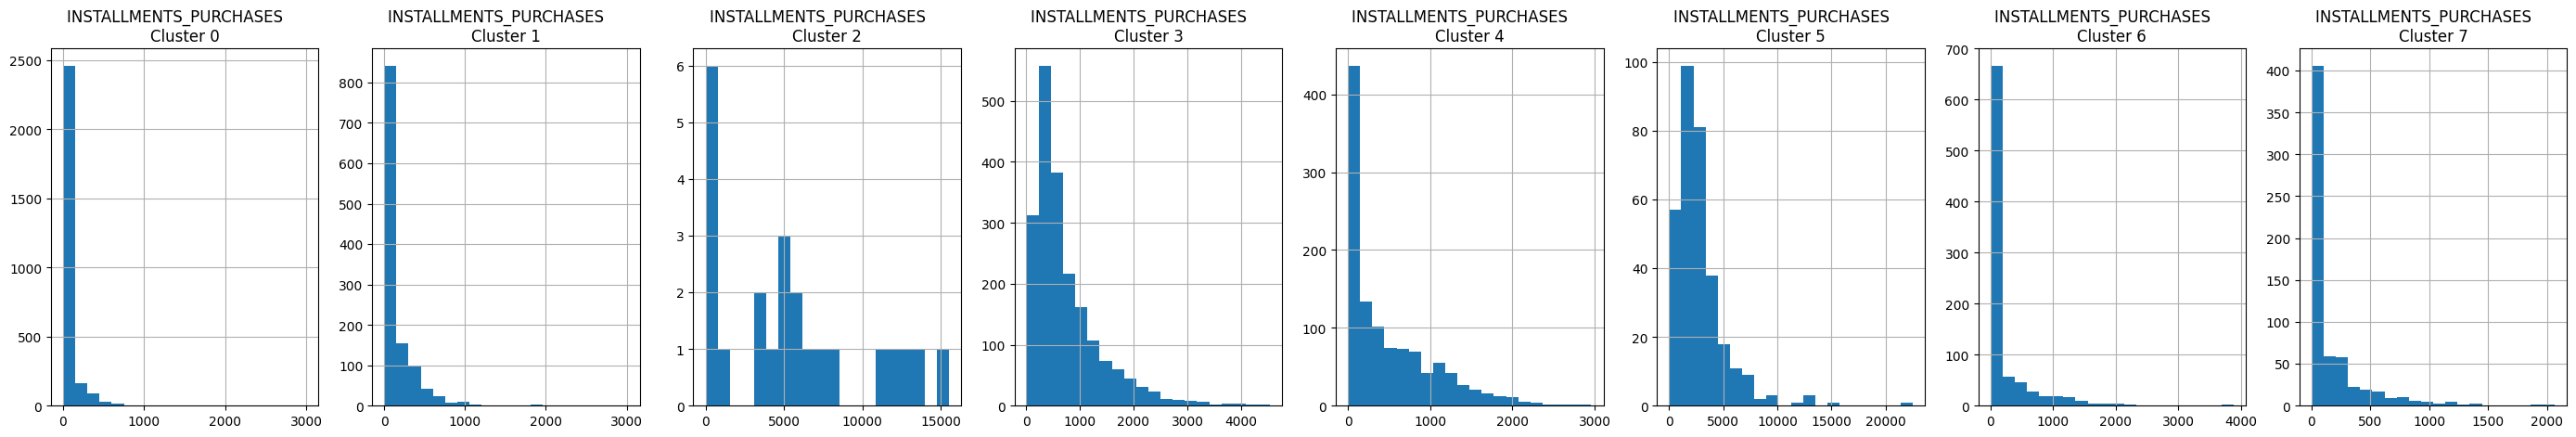

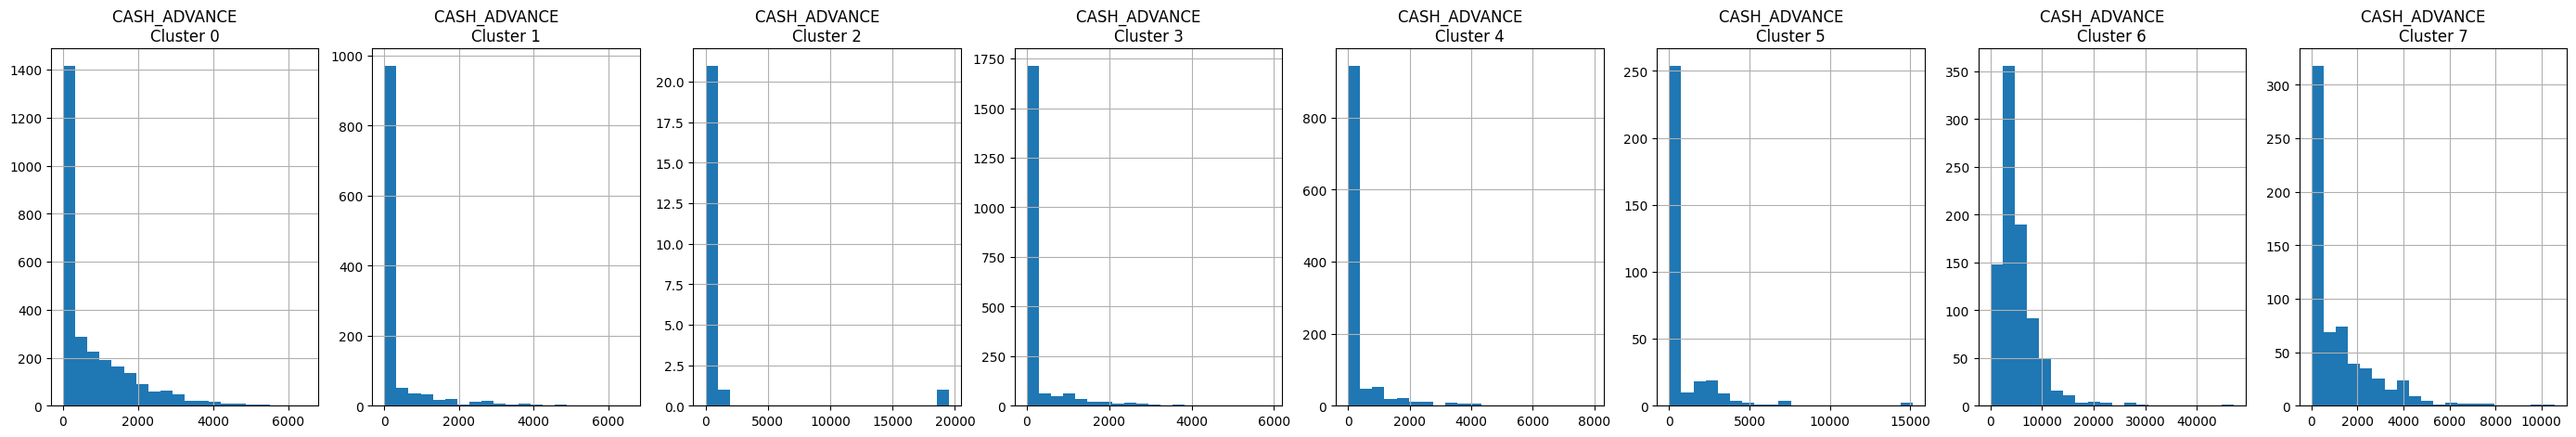

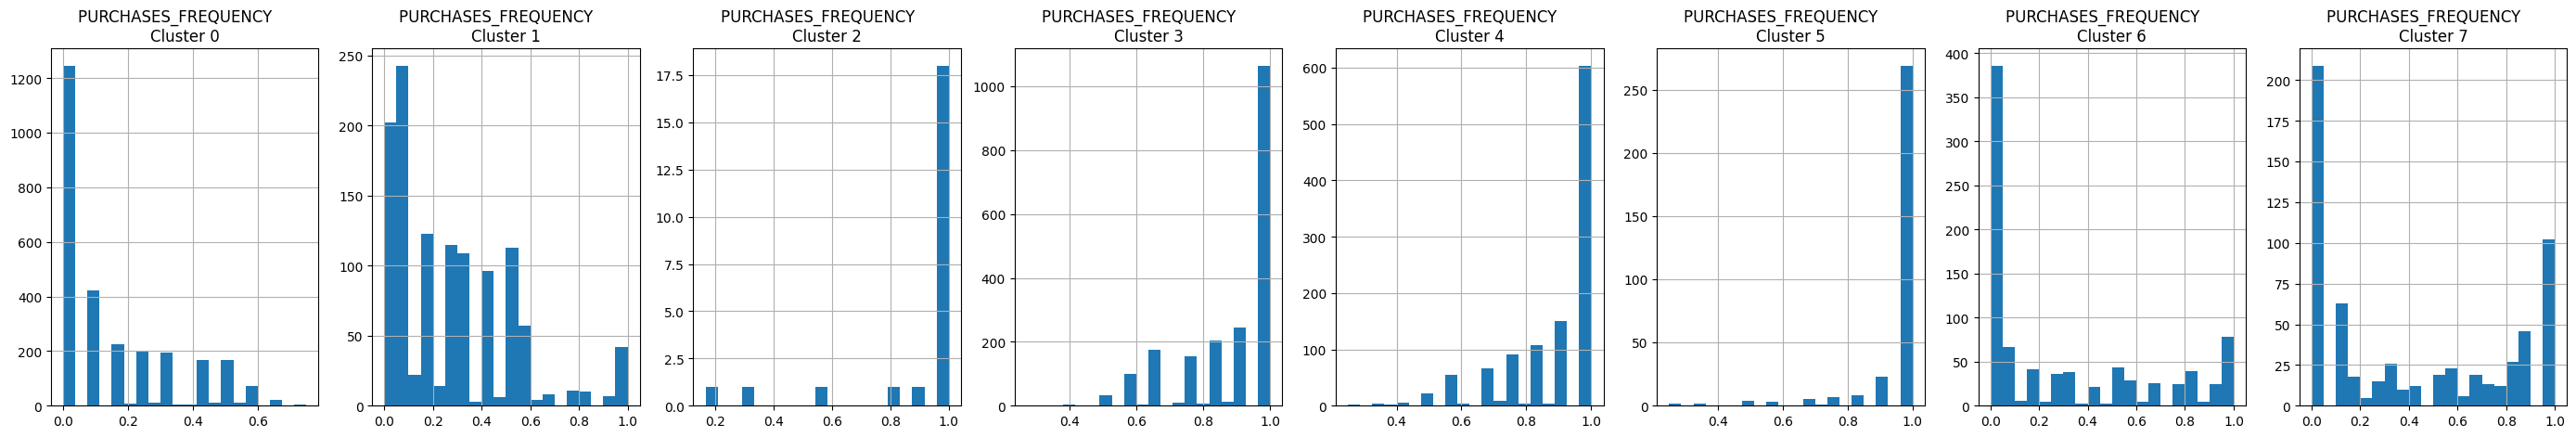

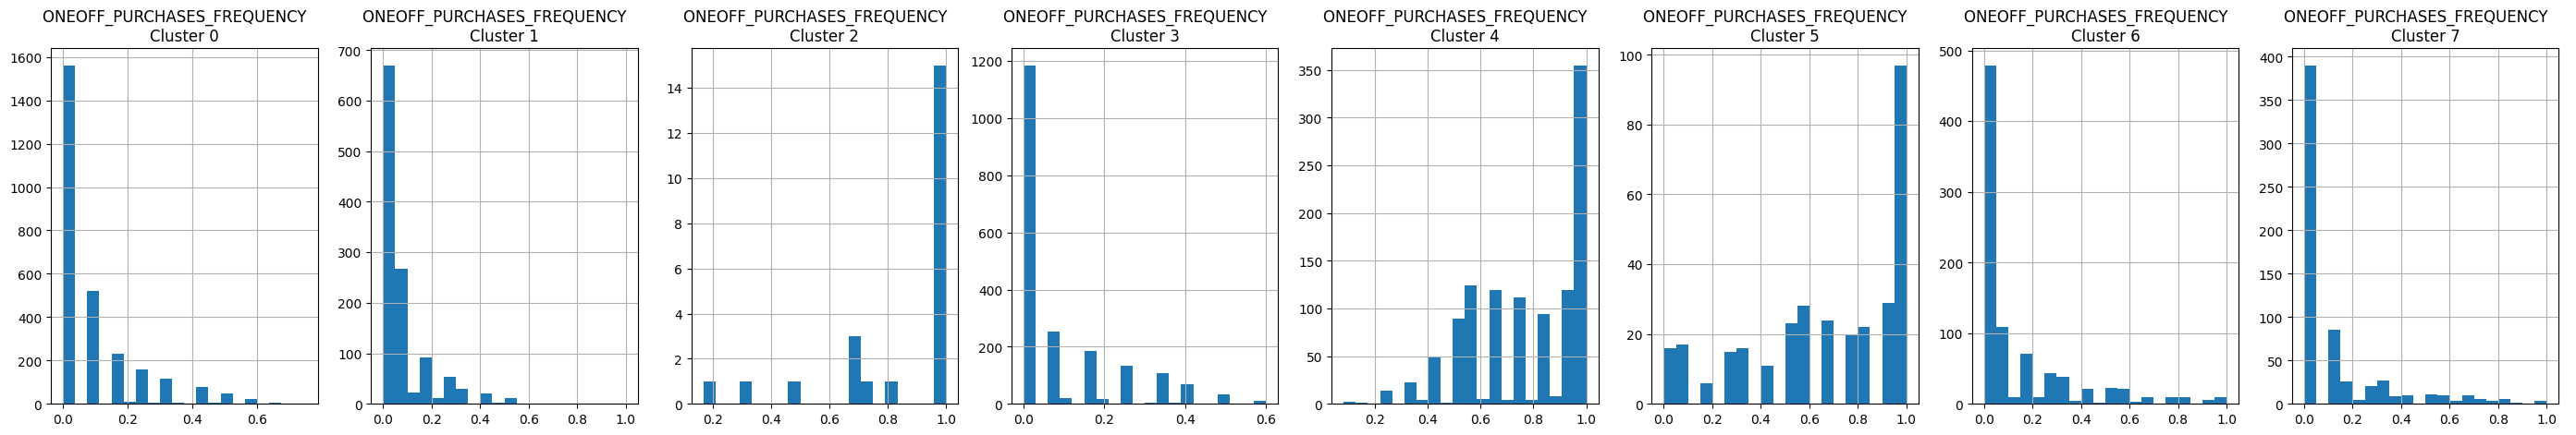

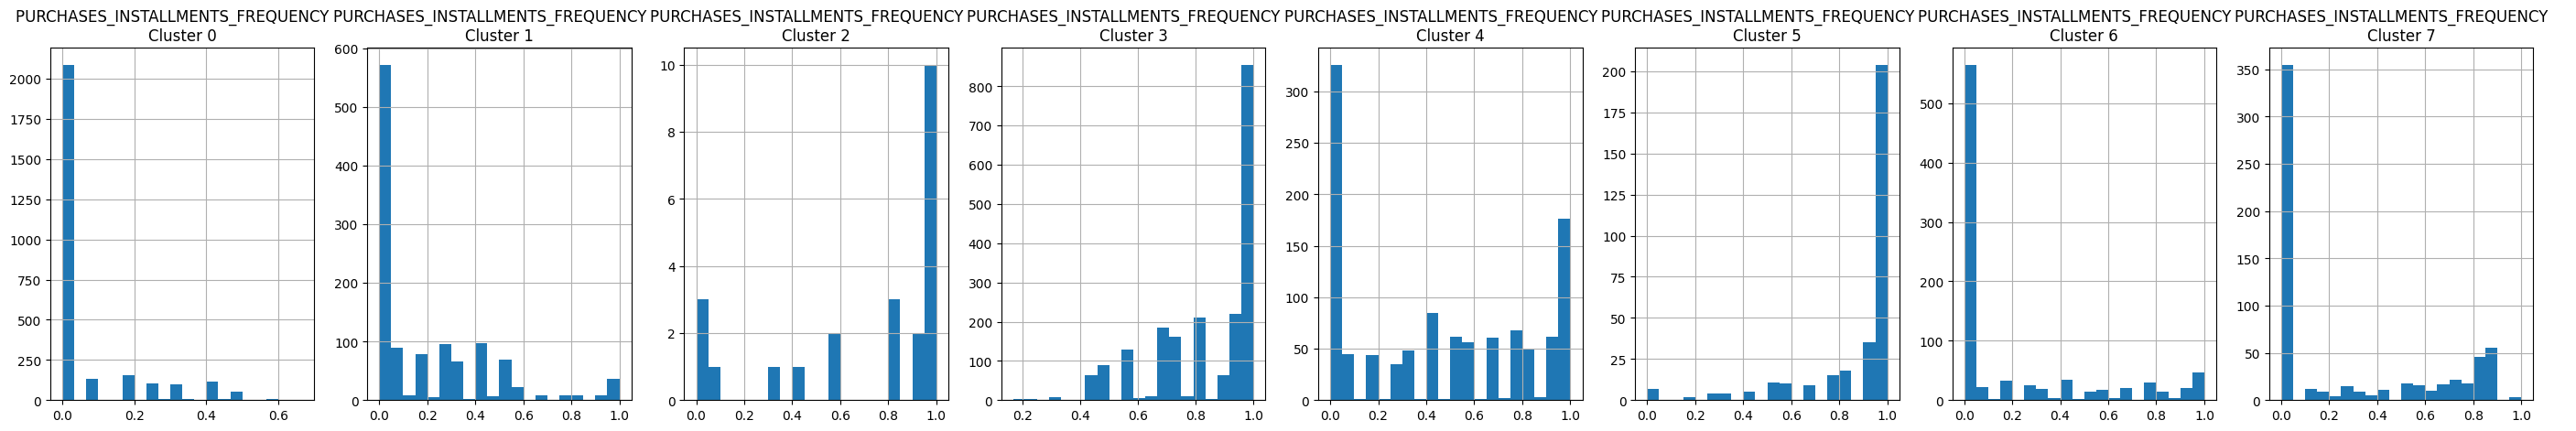

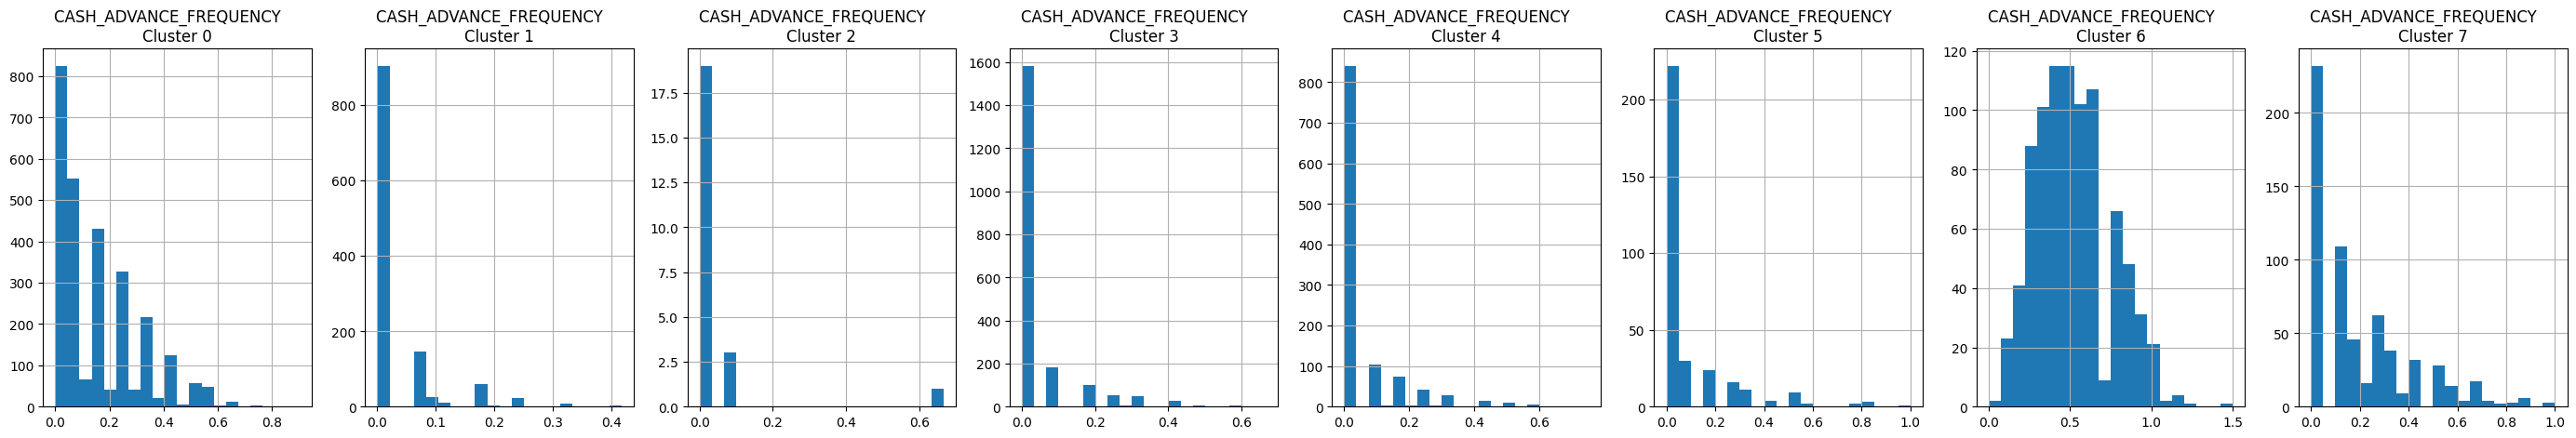

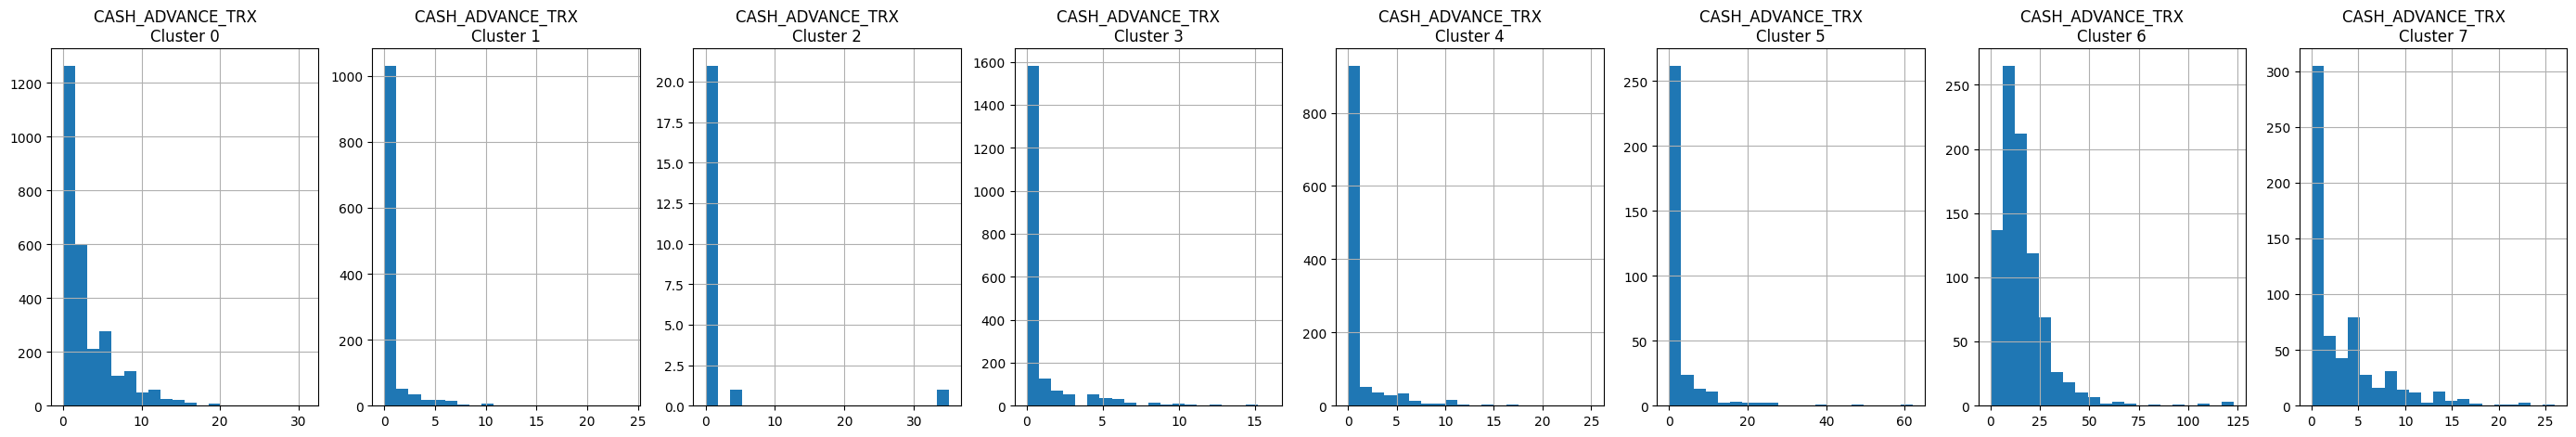

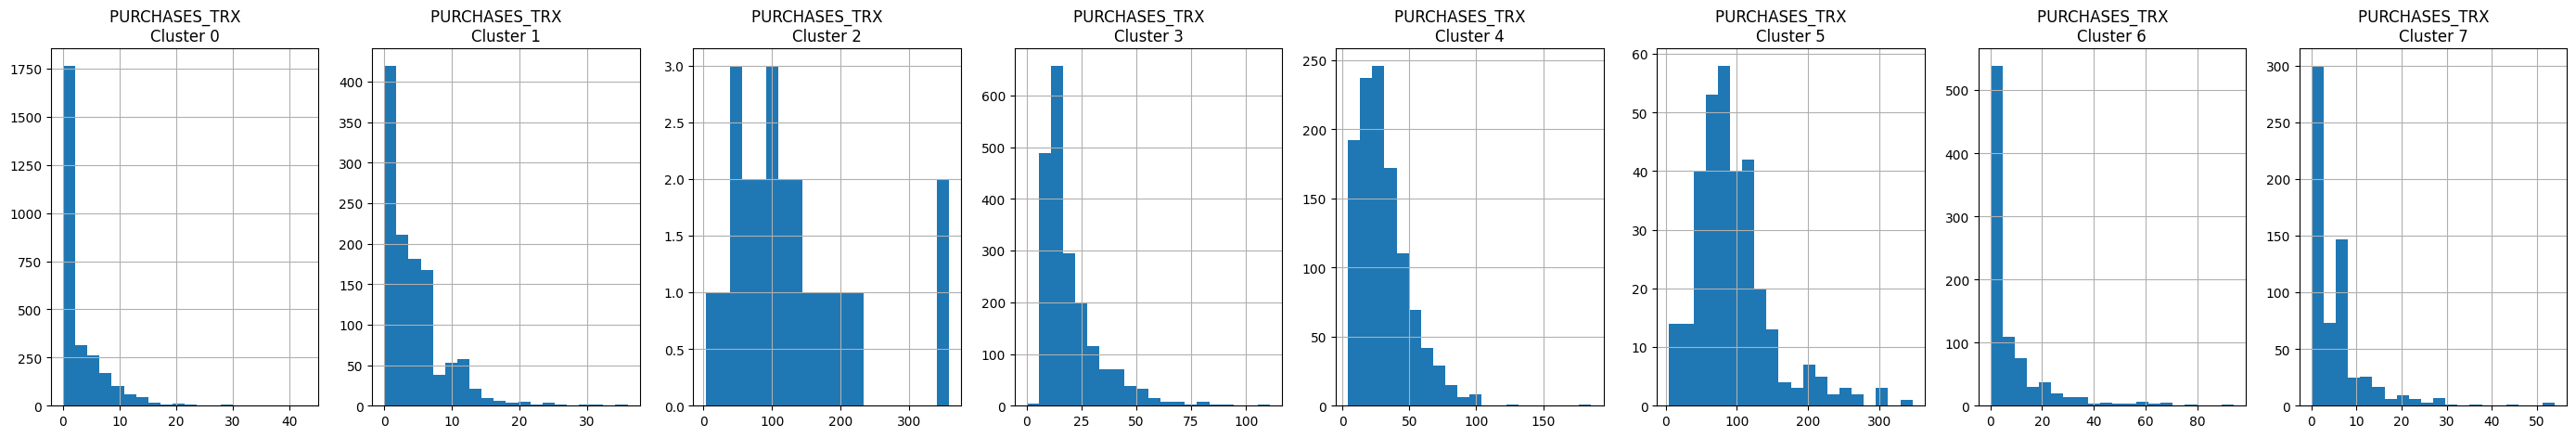

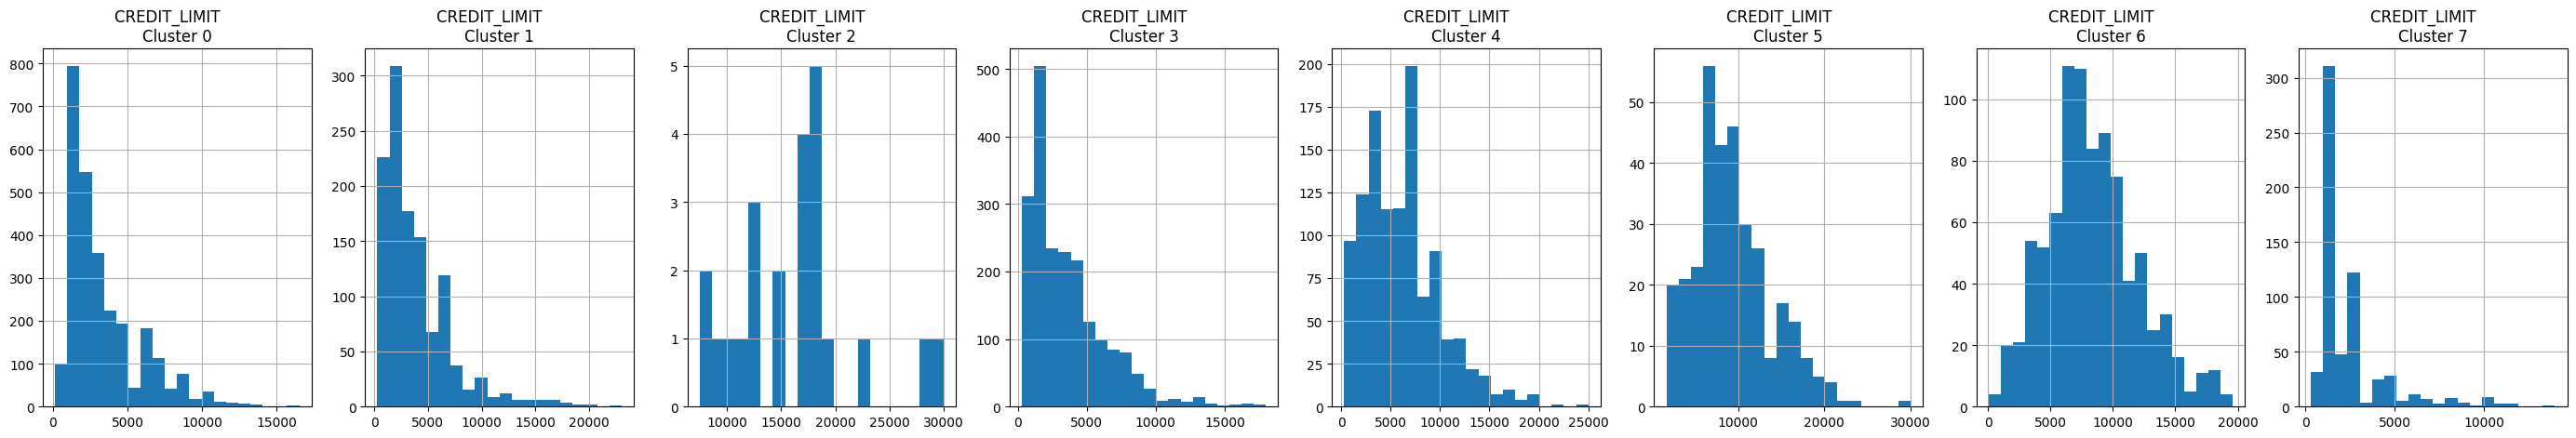

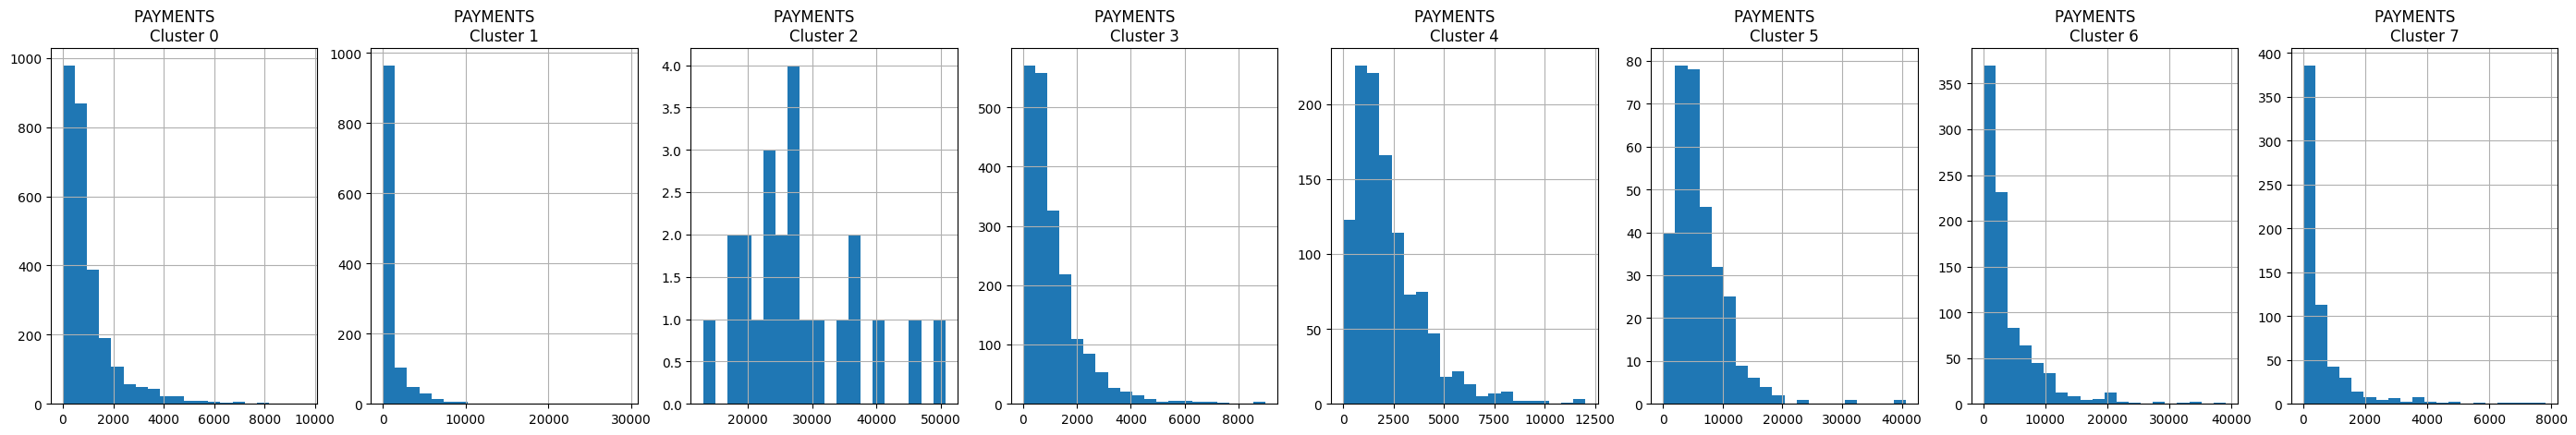

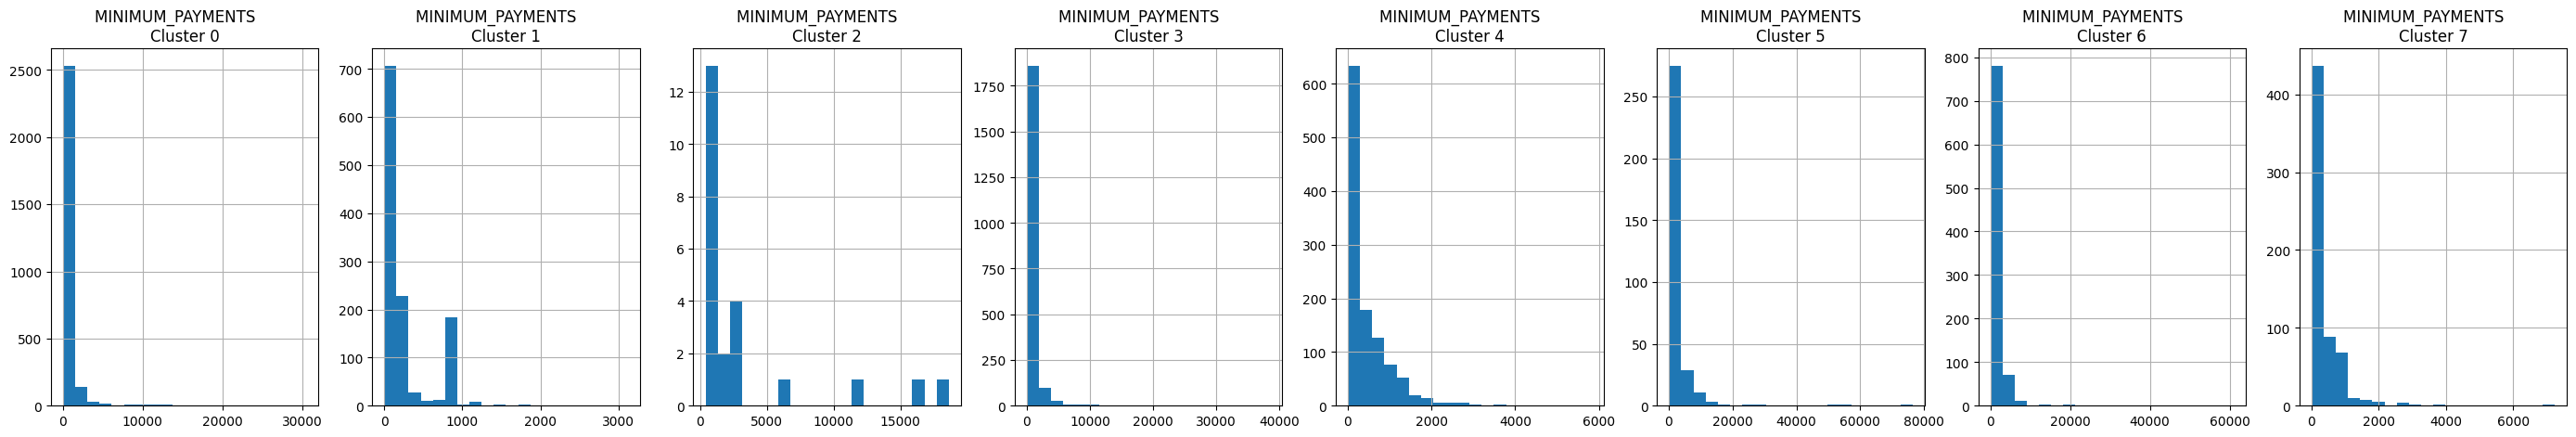

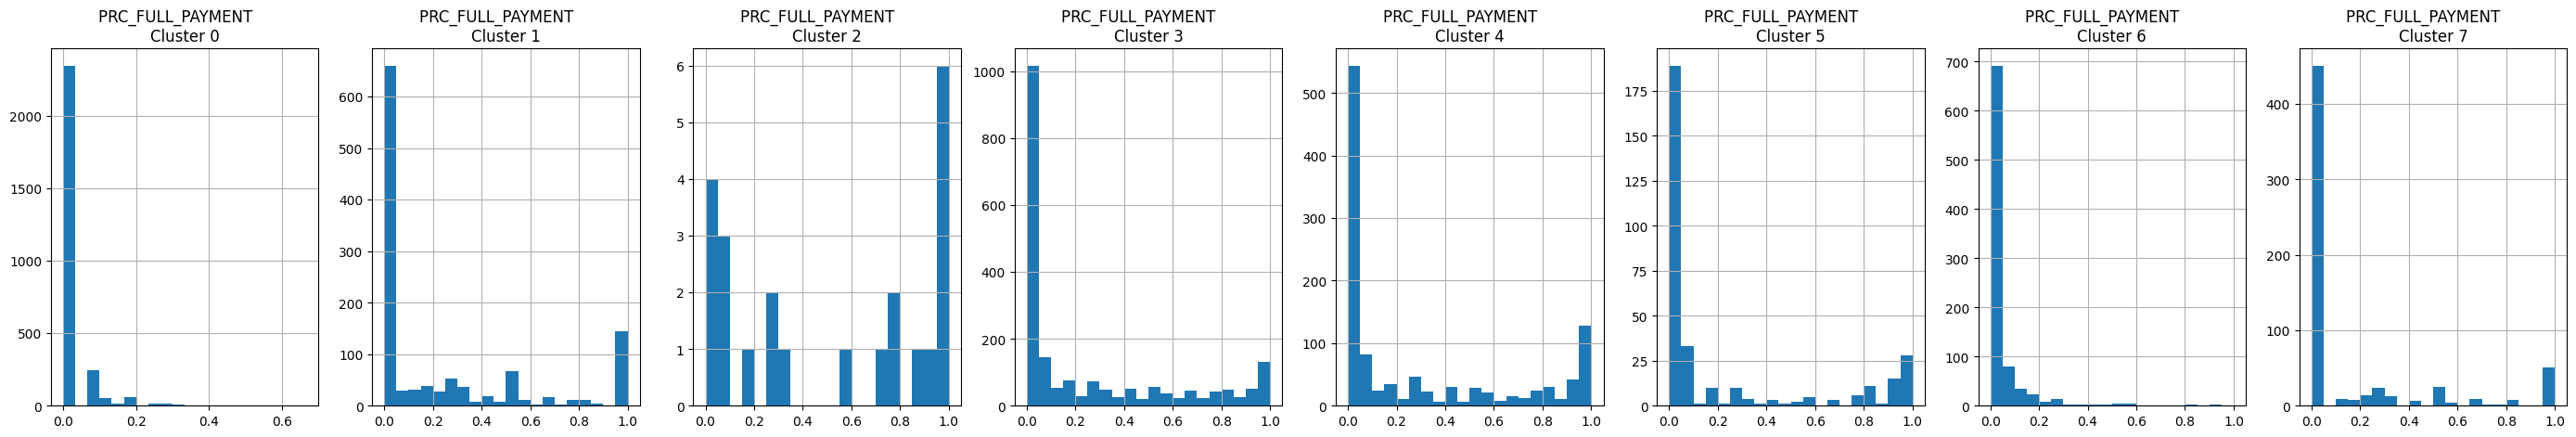

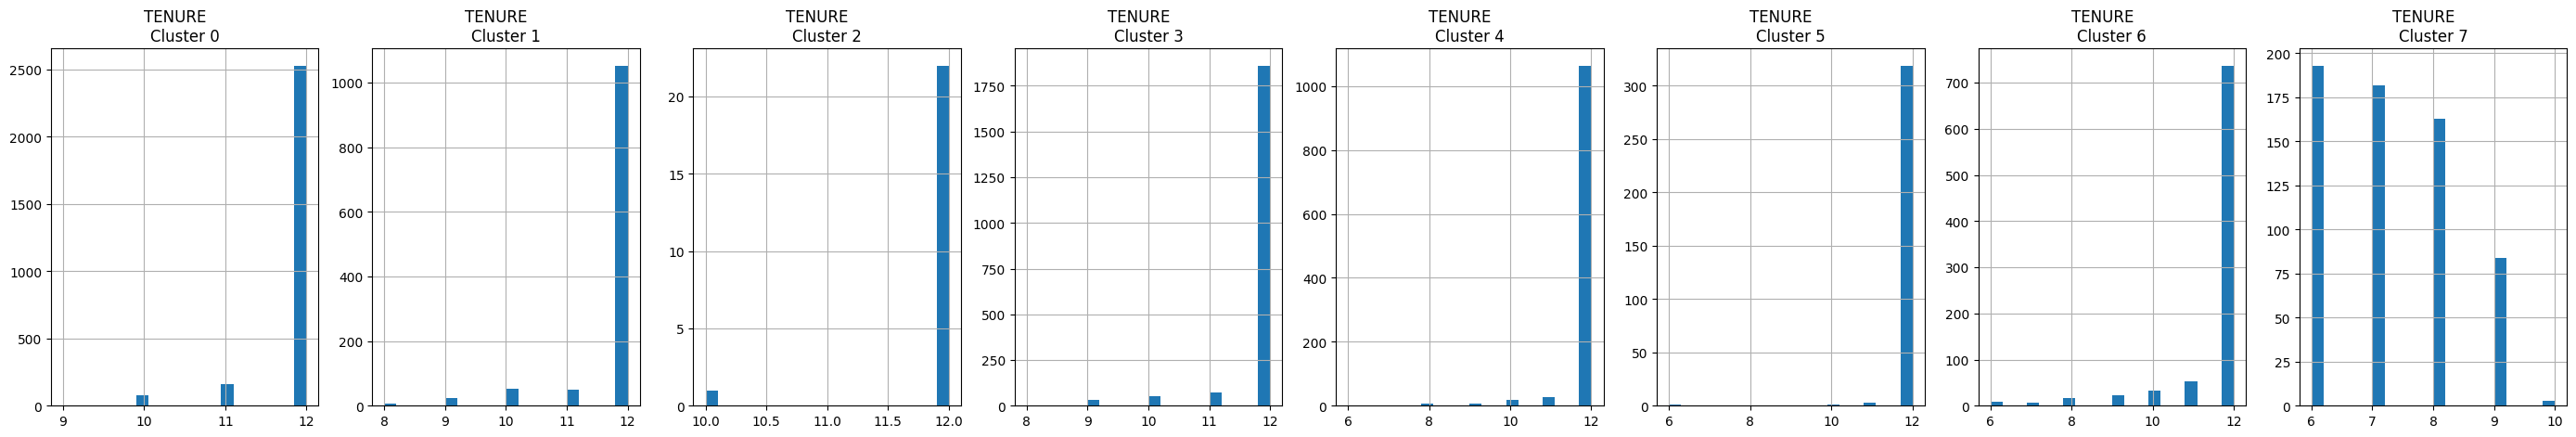

In [20]:
# Display histograms for each cluster.
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{}    \nCluster {}'.format(i,j))

+ Cluster 0: it has more balance, the balance frequency is updated frequently
+ Cluster 1: very low balance, purchases are not frequent
+ Cluster 2: cluster number 5 has high purchases while its balance is in mid range and the purchases made in one go is very high
+ Cluster 3: it has a high purchase frequency, tenure is mostly at 12
+ Cluster 4: has low balance in their account, their purchases are very low, cash advances are frequents
+ Cluster 5: it has high purchases, the balance frequency is updated frequently and a lower cash advance
+ Cluster 6: this cluster seems to have a normal distribution skewed to the left in balance variable and high amounts of cash advance
+ Cluster 7: this cluster has low balance, almost none cash advance


# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS 

PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data.

In [21]:
# Obtaining the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221953, -1.07644999],
       [-1.13829405,  2.50648158],
       [ 0.96968518, -0.38351257],
       ...,
       [-0.92620309, -1.81078768],
       [-2.3365522 , -0.65797187],
       [-0.55642414, -0.40046932]])

In [22]:
# Creating a dataframe with the tow components
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138294,2.506482
2,0.969685,-0.383513
3,-0.873627,0.043167
4,-1.599433,-0.688581


In [23]:
# Concatenate the labels of the clusters with the dataframe of the main components.
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,0
1,-1.138294,2.506482,6
2,0.969685,-0.383513,4
3,-0.873627,0.043167,0
4,-1.599433,-0.688581,0


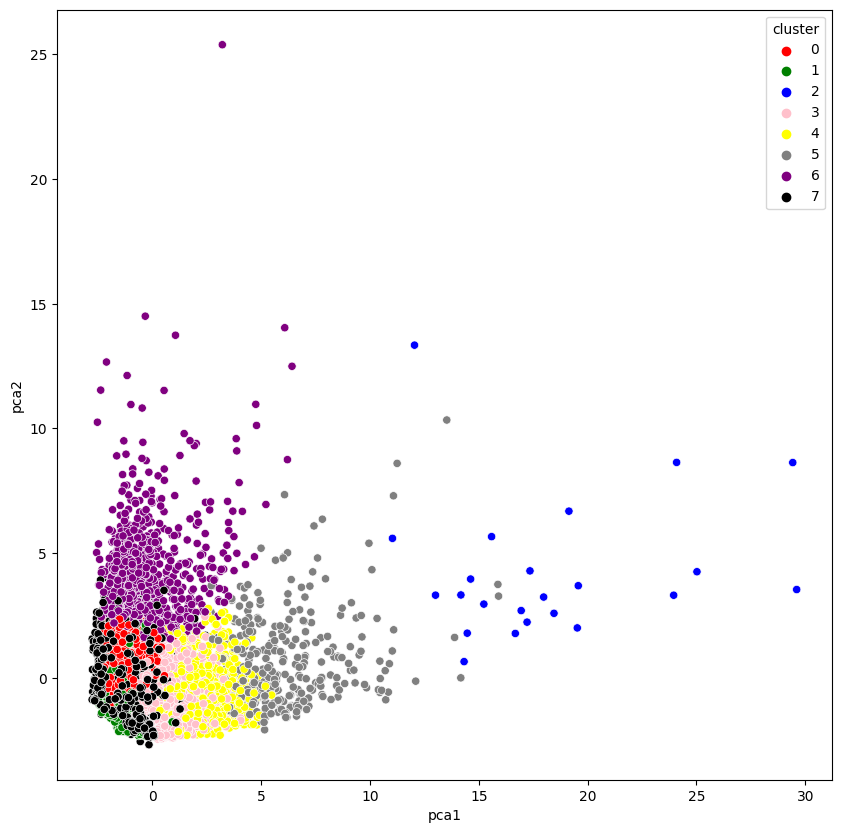

In [24]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df,
                    palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])
plt.show()

It has some overfitting among clusters 0 and 3, the dataset was taken using all variables, we can use autoencoders to reduce size.

# APPLY AUTOENCODERS (REDUCE DATA SIZE WITH AUTOENCODERS)

In [25]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7 
input_df = Input(shape = (17, )) 
# Glorot normal (Xavier normal initializer)
x = Dense(encoding_dim, activation = 'relu')(input_df) 
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(10,  activation='relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x) 
autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded) 
autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')
# The goal of Xavier Initialization is to initialize the weights such that the variance of the activations are the same across every layer.
# This constant variance helps prevent the gradient from exploding or vanishing.

In [26]:
autoencoder.summary()
# it is necessary to notice how the parameters increase in the first layers.
# in the first layers up to layer 3, the strong correlation between the variables breaks down
# in the fourth layer in the center everything is compressed in 10 variables 
# from these 10, we decompress and remove a deep layer so that the model does not tend to mislead itself and copy the information directly from one layer to the other.
# information directly from one layer to the next and face more problems to carry out the reconstruction to avoid multicollinearity.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [27]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 4s 36ms/step - loss: 0.5223
Epoch 2/25
70/70 [==============================] - 3s 41ms/step - loss: 0.2575
Epoch 3/25
70/70 [==============================] - 3s 45ms/step - loss: 0.1982
Epoch 4/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1547
Epoch 5/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1438
Epoch 6/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1284
Epoch 7/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1213
Epoch 8/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1037
Epoch 9/25
70/70 [==============================] - 3s 38ms/step - loss: 0.0966
Epoch 10/25
70/70 [==============================] - 2s 35ms/step - loss: 0.0904
Epoch 11/25
70/70 [==============================] - 2s 36ms/step - loss: 0.0868
Epoch 12/25
70/70 [==============================] - 3s 41ms/step - loss: 0.0893
Epoch 13/25
70/70 [==================

In [28]:
autoencoder.save_weights('autoencoder.h5') # saving the model

In [29]:
pred = encoder.predict(creditcard_df_scaled) # predict using 10 variables

280/280 [==============================] - 1s 4ms/step


In [30]:
pred.shape

(8950, 10)

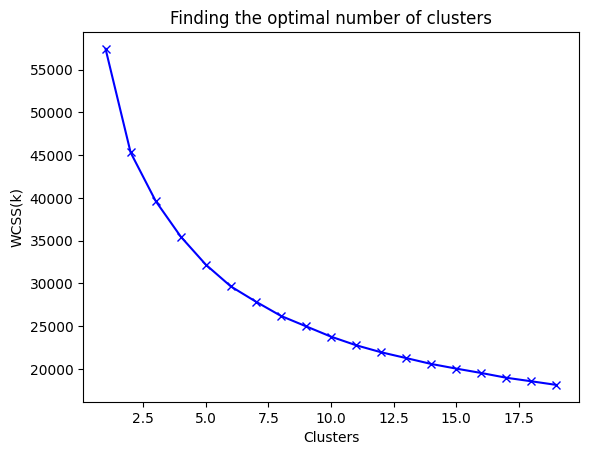

In [31]:
scores_2 = [] #
range_values = range(1, 20)
#
#
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_) # WCSS

plt.plot(range_values, scores_2, 'bx-') # parameters and points x-
plt.title("Finding the optimal number of clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

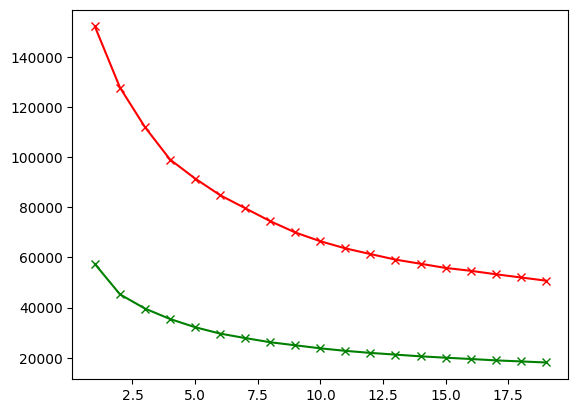

In [32]:
plt.plot(range_values, scores_1, 'bx-', color='r') # this the previous exercise where Kmeans and PCA were implemented
plt.plot(range_values, scores_2, 'bx-', color='g') # k = 4 for autoencoders

In [33]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels=kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [34]:
df_cluster_df = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [35]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.499169,-0.204608
1,1.046726,2.067281
2,0.430229,-0.082192
3,-0.154909,0.220930
4,-1.601402,-0.195531


In [36]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.499169,-0.204608,0
1,1.046726,2.067281,3
2,0.430229,-0.082192,2
3,-0.154909,0.220930,2
4,-1.601402,-0.195531,0
...,...,...,...
8945,-0.074716,-0.983993,2
8946,-0.454524,-0.935603,0
8947,-0.198585,-0.605030,2
8948,-0.484488,-0.392741,0


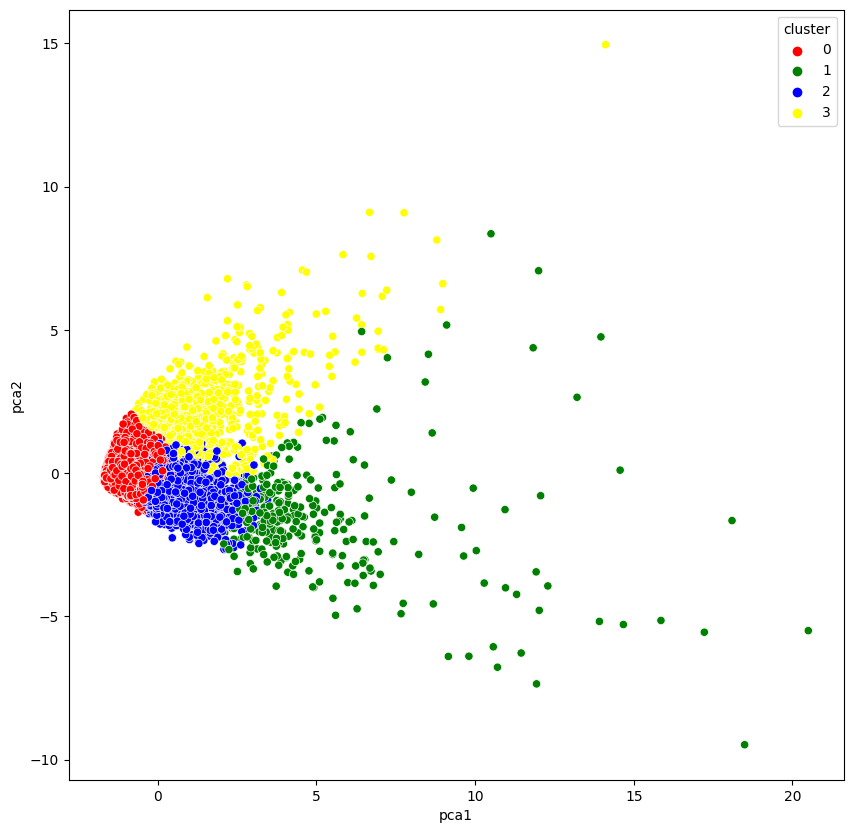

In [37]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()

Using KMeans with Autoencoders make the clustering more organized and structured according to their features and characteristics. So with this example we clearly identify clients and groups there are some outliers among clusters that must be treated and the last cluster is disperse but in general using this technique clients are more identified than the first eexercise.